# Used-Cars

## Programming for Data Science Course from University of Science
## Final project

### Team members
<center>

|MEMBERS           |ID     |
|:-------------------|:-------|
|Vũ Minh Chiến        |22127045 |
|Quách Trần Quán Vinh |22127460 |

</center>

### **1. Collecting data**

What subject is your data about?
- Craigslist is the world's largest collection of used vehicles for sale, this dataset includes part of used vehicle entry within the United States on Craigslist.

What is the source of your data?
- The source of this data set can be found in [kaggle](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data). For this project, we have reduce the origin data set, which contains 426880 rows, down to 100000 rows (the reason for this will be mentioned in reflection part).

Do authors of this data allow you to use like this?
- Yes, this data set have `CC0: Public Domain` license (you can find more informaitons about the license [here](https://creativecommons.org/publicdomain/zero/1.0/)).

How did authors collect data?
- The arthor collect data by a web application built with Flask which scrapes used vehicle listings weekly from all regional Craigslist sites in the United States (you can find more informaitons on scraping process [here](https://github.com/AustinReese/UsedVehicleSearch)).

##### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import f_oneway

##### Read the dataset

In [2]:
df = pd.read_csv('vehicles.zip', delimiter=',', compression='zip')

### **2. Exploring data**

In [3]:
# display 5 rows for visualize
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
471,7303586604,https://akroncanton.craigslist.org/ctd/d/union...,akron / canton,https://akroncanton.craigslist.org,6600,2011.0,infiniti,NaN,excellent,6 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00J0J_kYKA82bXQc...,"2011 BMW 328i Sport 112,000 Miles Automatic 3....",NaN,oh,40.963700,-81.421100,2021-04-08T09:34:12-0400
93065,7310609199,https://ventura.craigslist.org/ctd/d/ventura-2...,ventura county,https://ventura.craigslist.org,6500,2013.0,ford,focus se,excellent,4 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00j0j_aFTGdUpCLl...,"2013 FORD FOCUS SE 4 cylinder, automatic, full...",NaN,ca,34.274424,-119.270614,2021-04-21T16:01:16-0700
31109,7312882698,https://fresno.craigslist.org/ctd/d/clovis-201...,fresno / madera,https://fresno.craigslist.org,10999,2012.0,toyota,camry,like new,4 cylinders,...,mid-size,sedan,blue,https://images.craigslist.org/00U0U_9XFywdST0Q...,2012 TOYOTA CAMRY YES... YOU ARE APPROVED!!...,NaN,ca,36.831443,-119.699919,2021-04-26T10:06:24-0700
31806,7309947041,https://fortmyers.craigslist.org/col/ctd/d/nap...,ft myers / SW florida,https://fortmyers.craigslist.org,54900,2016.0,porsche,cayman,excellent,6 cylinders,...,sub-compact,coupe,blue,https://images.craigslist.org/01111_bqajvsW8Dp...,2016 Porsche Cayman - (Dark Blue Metallic) ...,NaN,fl,26.146790,-81.766670,2021-04-20T14:34:41-0400
56918,7313954855,https://myrtlebeach.craigslist.org/ctd/d/conwa...,myrtle beach,https://myrtlebeach.craigslist.org,15980,2011.0,gmc,acadia,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00707_32coGTIyU6...,2015 GMC ACADIA ******* Brothers Auto Sales of...,NaN,sc,33.771399,-79.020045,2021-04-28T14:34:02-0400


##### How many rows and columns are there in the dataset?

In [4]:
rows, cols = df.shape
print(f'Number of rows: {rows} \nNumber of columns: {cols}')

Number of rows: 100000 
Number of columns: 26


##### What is the meaning of each row/column?

- Each row corresponds to an used car with different attributes being sale.
- Columns meaning:
  - `id`: A unique identifier for each vehicle. Used to distinguish records in the dataset.
  - `url`: A **Craigslist** web address of the vehicle.
  - `region`: The geographic area where the vehicle is listed for sale.
  - `region_url`: A **Craigslist** web address for the region's page where the vehicle is listed..
  - `price`: Price of the vehicle.
  - `year`: The manufracture year of the vehicle.
  - `manufacturer`: The brand or company that manufactured the vehicle.
  - `model`: The specific model of the vehicle.
  - `condition`: The state of the vehicle.
  - `cylinders`: The number of cylinders in the engine.
  - `fuel`: The type of fuel the vehicle uses.
  - `odometer`: The mileage of the vehicle at the time of listing.
  - `title_status`: The legal status of the vehicle's title (e.g., clean, salvage).
  - `transmission`: The type of transmission system (e.g., automatic, manual).
  - `VIN`: Vehicle Identification Number—a unique code assigned to every vehicle.
  - `drive`: The drivetrain type (e.g., front-wheel drive (FWD), rear-wheel drive (RWD)).
  - `size`: The physical size of the vehicle.
  - `type`: The vehicle's purpose or category (e.g., SUV, sedan, truck).
  - `paint_color`: The color of the vehicle's exterior paint.
  - `image_url`: The web address of an image showcasing the vehicle in the listing.
  - `description`: A textual description of the vehicle written by the seller.
  - `county`: The county where the vehicle is listed for sale.
  - `state`: The state where the vehicle is listed for sale.
  - `lat`: The latitude coordinate of the vehicle’s location.
  - `long`: The longitude coordinate of the vehicle’s location.
  - `posting_date`: The date this car has been post on the website.

##### Are there any duplicated rows?

In [5]:
if df.duplicated().sum() != 0:
    print("There are duplicate rows")
else:
    print('There aren\'t duplicate rows')

There aren't duplicate rows


##### What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

There are some inappropriate data type:
- `county`: name of a place $\rightarrow$ should be `object` type instead of `float64` type.

In [7]:
# Checking for distinct values
df['county'].unique()

array([nan])

Since all values of `county` column are missing, we remove this column from the dataset.

In [8]:
df.drop(columns='county', inplace=True)

- `posting_date`: indicates the date $\rightarrow$ should be `datetime` type instead of `object` type

In [9]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [10]:
df['posting_date']

0       2021-04-17 14:03:43+00:00
1       2021-04-29 00:01:43+00:00
2       2021-04-28 16:13:23+00:00
3       2021-04-11 03:06:29+00:00
4       2021-04-14 20:46:17+00:00
                   ...           
99995   2021-04-28 13:31:13+00:00
99996   2021-05-02 14:51:35+00:00
99997   2021-04-14 20:53:27+00:00
99998   2021-04-12 17:20:51+00:00
99999   2021-04-28 13:00:22+00:00
Name: posting_date, Length: 100000, dtype: datetime64[ns, UTC]

##### With each numerical column, how are values distributed?

- Min? max? Are they abnormal?

In [11]:
numerical_features = df.select_dtypes('number').columns

min_vals = df[numerical_features].min(axis=0)
max_vals = df[numerical_features].max(axis=0)

min_max_numeric = pd.DataFrame({'min': min_vals, 'max': max_vals})
min_max_numeric

,min,max
id,7.209065e+09,7.317098e+09
price,0.000000e+00,3.009549e+09
year,1.900000e+03,2.022000e+03
odometer,0.000000e+00,1.000000e+07
lat,-4.923221e+01,7.786064e+01
long,-1.597199e+02,1.676299e+02


Min value of `price` is **0**, which is abnormal. Therefore, we can consider **0** as **missing values**. 

In [12]:
# Convert all zero values of price column to NaN
df['price'] = df['price'].replace(0, np.nan)

- What is the percentage of missing values?

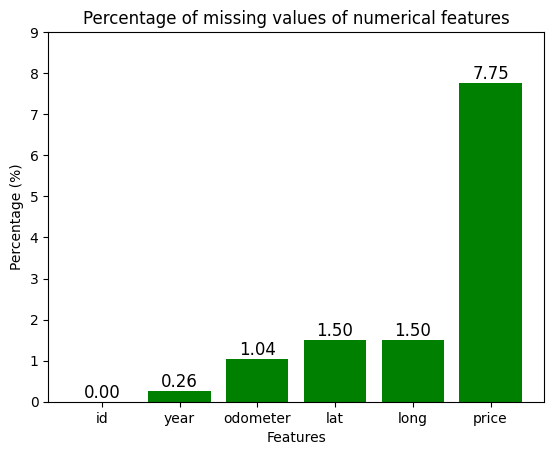

In [13]:
missing_numeric = df[numerical_features].isna().sum()/rows * 100
missing_numeric = missing_numeric.sort_values()

bars = plt.bar(missing_numeric.index, missing_numeric.values, color='green')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)
    
plt.ylim((0, 9))
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of numerical features');

##### With each categorical column, how are values distributed?

- Visualize the missing values in catergorical columns

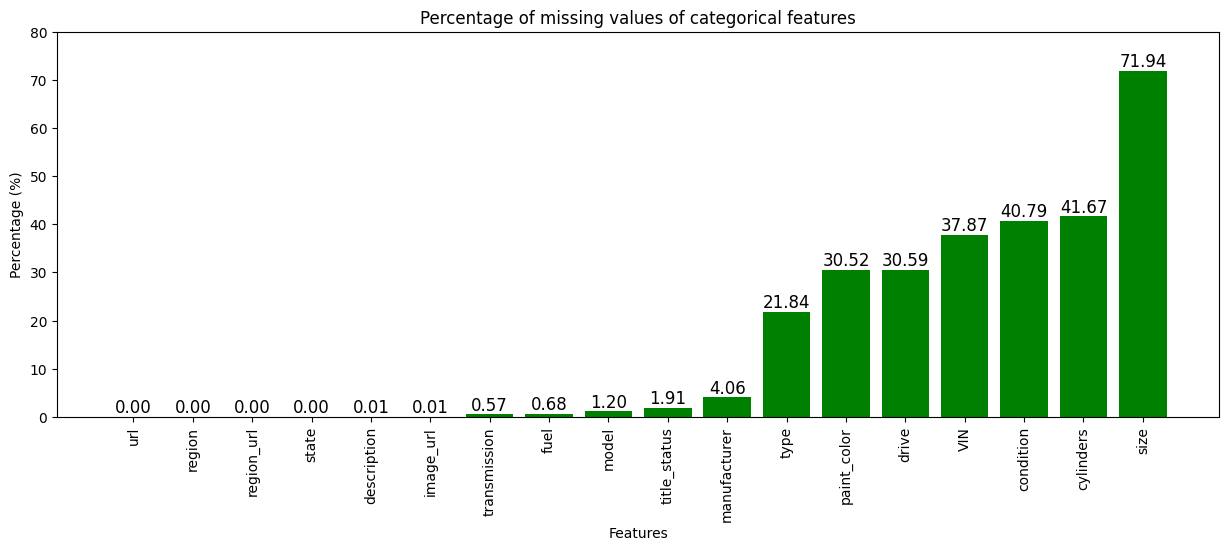

In [14]:
# get all object columns
object_features = df.select_dtypes('object').columns

# get the percentage of missing values
object_features_values = df[object_features].isna().sum()/rows * 100

# sort values in ascending order
object_features_values = object_features_values.sort_values(ascending=True)

# visualize the missing value with a bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(object_features_values.index, object_features_values.values, color='green')

# add notation to bar chart
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim((0, 80))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of categorical features')
plt.show();

- The column `size` have a significant missing values so dropping this column is the best option

In [15]:
df.drop(columns='size', inplace=True)

#### Take a closer look into other columns

In [16]:
# get all object columns
object_features = df.select_dtypes('object').columns

df[object_features].describe().T

,count,unique,top,freq
url,100000,100000,https://zanesville.craigslist.org/ctd/d/carrol...,1
region,100000,403,columbus,847
region_url,100000,413,https://phoenix.craigslist.org,747
manufacturer,95945,42,ford,16660
model,98796,13749,f-150,1935
condition,59205,6,good,28320
cylinders,58332,8,6 cylinders,22137
fuel,99323,5,gas,83641
title_status,98091,6,clean,94927
transmission,99429,3,automatic,79021


- Here we can see all the values with highest appearances in each categorical columns. All the columns seem normal except one,  `VIN` columns must have a unique code for each cars, but here we get 59 cars with the same `VIN`, but as we have seen above there aren't any duplicate rows in this dataset so it a little bit of confuse here. So here we can delete the columns `VIN` as well, the reason is we already have the columns `id` with 100.000 distinct values for indentify each cars, moreover this column doesn't show much informaiton for analyzing.

In [17]:
df.drop(columns='VIN', inplace=True)

### **3. Asking meaningful questions**

##### **What factors most significantly impact used car prices?**
- This give us the insight of how each features affect the car pricing. The sellers can base on this to decide the price of the car which they want to sell to make the most of it.
- For buyers, this can help to determine how valuable a car is before buying it, this can help prevent buying bad cars with crazy price.

##### **What is the common trend of all sold cars (manufacturer, year, odometer,...)? What it says about the used cars in American?**
- Knowing the habbit of customers can help the sellers focus on what the customers are looking for so as to push the consumptions.
- The manufacturers can base on this to adjust their products to fit with more people.

### **4. Preprocessing + analyzing data to answer each question**

First we need to remove duplicate columns, `region` and `region_url` are duplicated so we will remove `region_url`.

In [18]:
df.drop(columns='region_url', inplace=True)

Here we only focus on analyzing the main features that affect the cars prices most so all the redundant features such as: 
- `url`: the url to the website is useless here because it does affect the car price nor the trend of sold cars. 
- `image_url`: of course customer want to see how the car looks like, but the image_url itself doesn't have any value for analyzing. 
- `lat` and `long`: these values are quite special, they represent the specific location of where the car is. But here, we already have the value `region` instead so we could ignore these values.
- `description`: this column does not give any useful information for analyzing.

In [19]:
df.drop(columns=['url', 'image_url', 'lat', 'long', 'description'], inplace=True)

The dataset have many missing value, so we need to deal with it first. Lets look at the percentage of missing values until now.

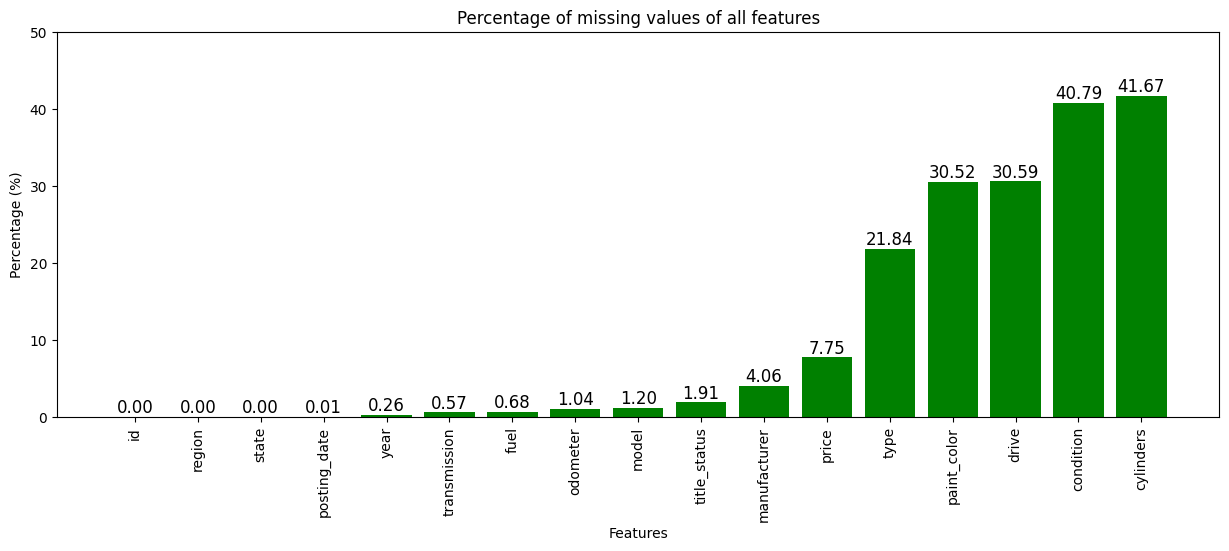

In [20]:
# get the percentage of missing values
missing_percent = df[df.columns].isna().sum()/rows * 100

# sort values in ascending order
missing_percent = missing_percent.sort_values(ascending=True)

# visualize the missing value with a bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(missing_percent.index, missing_percent.values, color='green')

# add notation to bar chart
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim((0, 50))
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.title('Percentage of missing values of all features')
plt.show();

Firstly, we need to observe the distribution to decide which method to use.

##### **Numerical features**

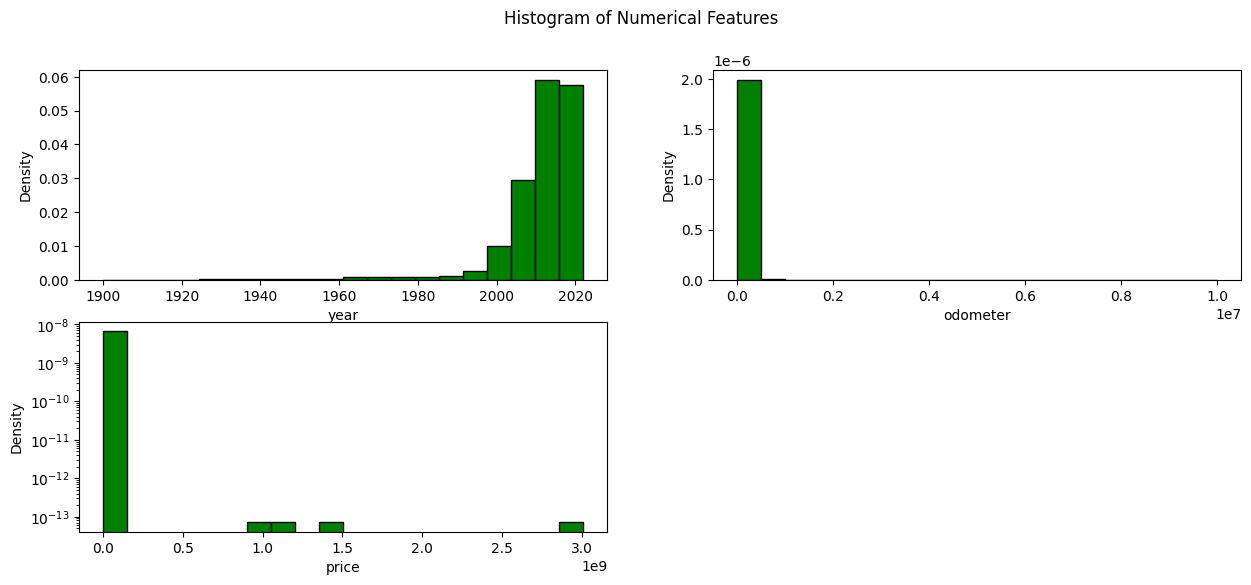

In [21]:
num_missing = missing_percent[missing_percent > 0].index.intersection(numerical_features)

fig, axes = plt.subplots((num_missing.size+1)//2, 2, figsize=(15, 6))
axes = axes.flatten()

for i, feature in enumerate(num_missing):
    axes[i].hist(df[feature], bins=20, density=True, color='green', edgecolor='black')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(feature)

for j in range(num_missing.size, len(axes)):
    fig.delaxes(axes[j])

axes[2].set_yscale('log')
axes[3].set_yscale('log')

fig.suptitle('Histogram of Numerical Features');

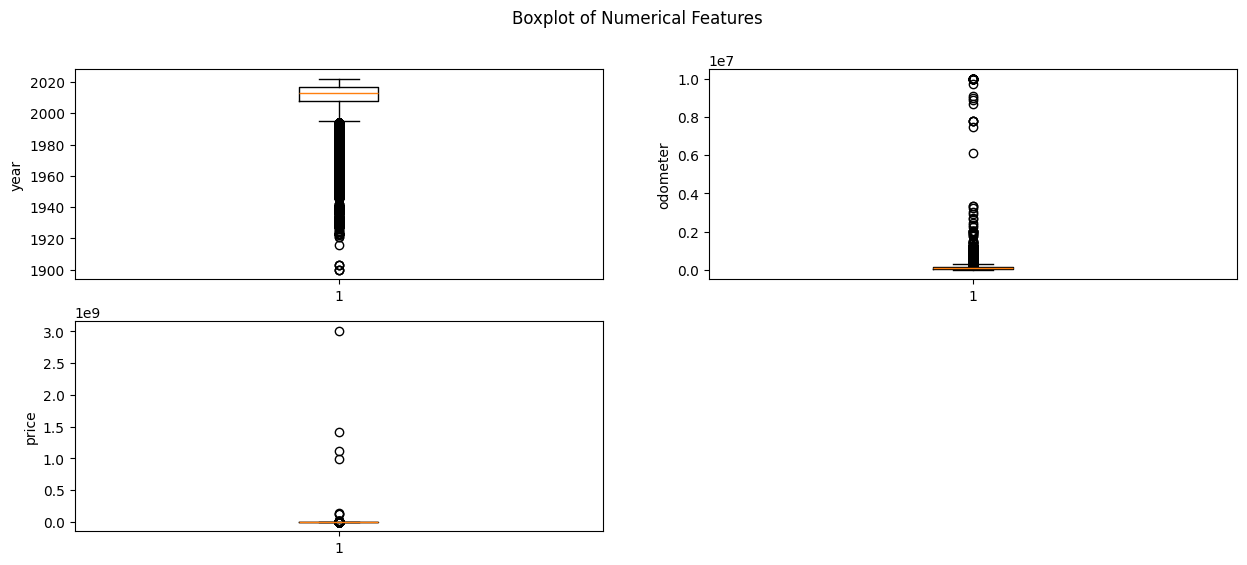

In [22]:
fig, axes = plt.subplots((num_missing.size+1)//2, 2, figsize=(15, 6))

axes = axes.flatten()

for i, feature in enumerate(num_missing):
    axes[i].boxplot(df[feature].dropna())
    axes[i].set_ylabel(feature)

for j in range(num_missing.size, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Boxplot of Numerical Features');

- `odometer` and `Price`: Highly left-skewed distribution with heavy presence of outliers. So that we impute **median** value instead of **mean** to avoid the influence of outliers.
- `year`: Relatively less skewed with clear bounds (e.g. around **1980**) and some extreme outliers. Since vehicle years are often repetitive, imputing missing values with the **most frequent value (mode)** is appropriate.
- `posting_date`: Left-skewed distribution without outliers. Similar with `year`, we can impute **mode** since the repetitive posting date is appropriate.

In [23]:
df[['odometer', 'price']] = df[['odometer', 'price']].fillna(df[['odometer', 'price']].median().iloc[0])
df[['year', 'posting_date']] = df[['year', 'posting_date']].fillna(df[['year', 'posting_date']].mode().iloc[0])

##### **Categorical features**

For categorical features, we decide to manually impute missing values to the **low proportions (under 20%)** of missing values features and apply classification algorithm for the **higher proportions (over 20%)**.

##### Under 20% features
As always, we oberve the distribution first then take the decision.

In [24]:
missing_percent[(missing_percent < 20) & (missing_percent > 0)].index.difference(num_missing)

Index(['fuel', 'manufacturer', 'model', 'posting_date', 'title_status',
       'transmission'],
      dtype='object')

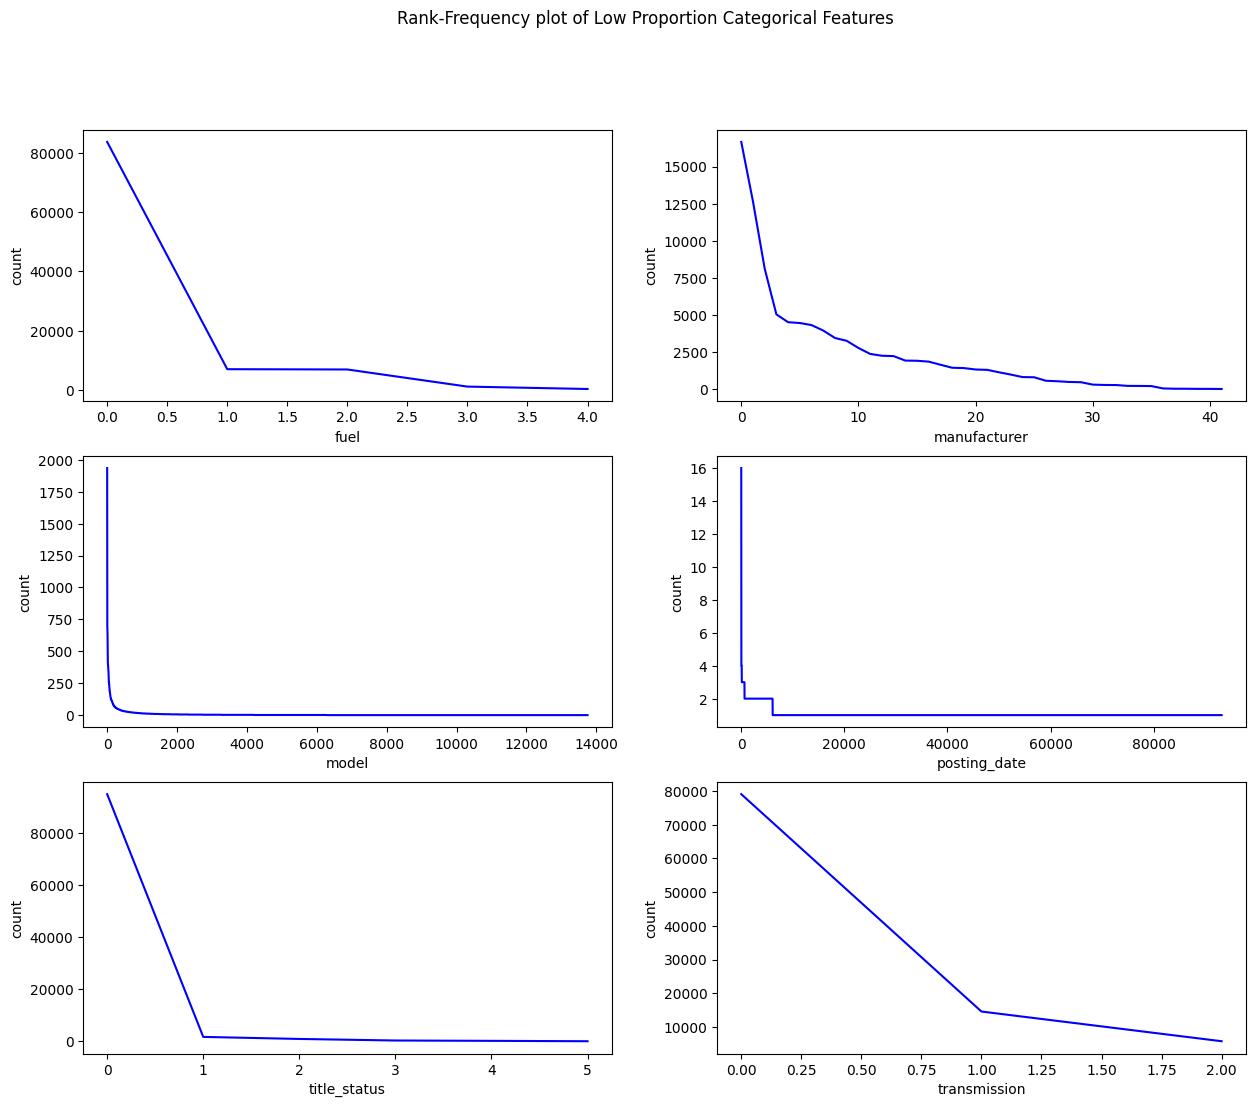

In [25]:
lower_cate_missing = missing_percent[(missing_percent < 20) & (missing_percent > 0)].index.difference(num_missing)

fig, axes = plt.subplots((lower_cate_missing.size+1)//2, 2, figsize=(15,(lower_cate_missing.size+1)//2 * 4))
axes = axes.flatten()

for i, feature in enumerate(lower_cate_missing):
    val_counts = df[feature].value_counts()
    axes[i].plot(range(val_counts.size), val_counts.values, color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
    
for j in range(lower_cate_missing.size, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Rank-Frequency plot of Low Proportion Categorical Features');

- `fuel`, `transmission`, `manufacturer` and `title_status`: There is a clear dominance of one category (high frequency at rank 0), **mode** imputation is the best choice.
- `model`: Imputation with **global constant**(e.g. Unknown, ...) may make more sense, because the count drops sharply and there are many low-frequency values.

In [26]:
mode_imputation_features = lower_cate_missing.difference(['model'])

df[mode_imputation_features] = df[mode_imputation_features].fillna(df[mode_imputation_features].mode().iloc[0])
df['model'] = df['model'].fillna('Unknown')

##### Over 20% features

Since the proportions of missing values of these features exceed 20%, applying **classification imputation** will be more precise. In this project, we will use **KNN** for predicting the missing values.

First we need to apply target `Ordinal Encoding` to convert all the categorical data to numeric. As **KNN** algorithm doesn't support categorical type. But before that we must see if there are any values that have the same counts.

The reason for choosing `Ordinal Encoding` because this dataset doesn't have the specific target for `Target Encoding` and some values also have the same count so `Count Encoding` can't be used either. Moreover, this dataset is too large to use `One-Hot Encoding` or `Dummy encoding`

In [27]:
# get the clumns with missing values
missing_cols = df.columns[df[df.columns].isna().any()]

missing_cols

Index(['condition', 'cylinders', 'drive', 'type', 'paint_color'], dtype='object')

In [28]:
# create a copy
df_encoding = df.copy()

# conveert posting date to str type
df_encoding['posting_date'] = df['posting_date'].astype(str)

# get the categorical columns 
cate_cols = []
for col in df_encoding.columns:
    if df_encoding[col].dtype == 'object':
        cate_cols.append(col)

cate_cols

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state',
 'posting_date']

There are 13 columns needs to be observed.

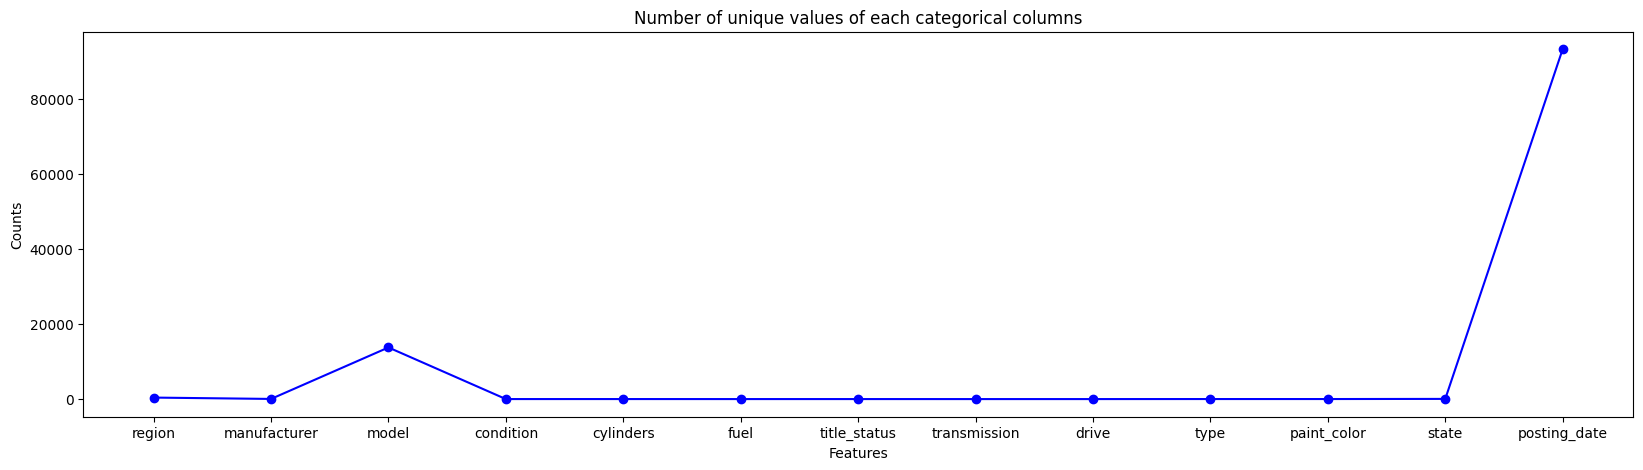

In [29]:
# count the number of unique values
unique_count = {}
for col in cate_cols:
    unique_count[col] = len(df[col].unique())

# visualize
plt.figure(figsize=(20, 5))
plt.plot(unique_count.keys(), unique_count.values(), 'bo-')
plt.ylabel('Counts')
plt.xlabel('Features')
plt.title('Number of unique values of each categorical columns')
plt.show();

No need to discuss `posting_date` only the number of `model` is nearly 20000 values, so we can see how big the matrix will if we apply `Onehot Encoding`.

In [30]:
# find if there are any values have the same count
for col in cate_cols:
    duplicate = df[col].value_counts()
    if duplicate.duplicated().any():
        print(f'{col} have {duplicate[duplicate.duplicated()].size} duplicate counts')
        break

region have 144 duplicate counts


`region` have 144 duplicated counts so we cant use `Count Encoding` for it.

Now apply `Ordinal Encoding` on the dataset.

In [31]:
for col in cate_cols:
    # store the ordinal of values
    ordinal = {}
    # get all unique values except nan
    unique = df[col][~df[col].isna()].unique()
    
    # get the ordival of each value
    for i, val in enumerate(unique):
        ordinal[val] = i

    # convert categorical to ordinal
    df_encoding[col] = df[col].map(ordinal).astype(float)

Check if the encoding works.

In [32]:
df_encoding.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date
60659,7310980106,237.0,18495.0,2018.0,2.0,247.0,NaN,NaN,0.0,10008.0,0.0,0.0,NaN,NaN,NaN,26.0,57881.0
77460,7311376120,298.0,20990.0,2017.0,0.0,1824.0,0.0,NaN,0.0,13614.0,0.0,2.0,1.0,2.0,2.0,0.0,28412.0
71705,7309915152,283.0,15999.0,2014.0,3.0,11222.0,NaN,0.0,0.0,105162.0,0.0,0.0,1.0,2.0,7.0,13.0,68012.0
42967,7315538508,166.0,149.0,1992.0,3.0,8132.0,1.0,1.0,0.0,126838.0,0.0,0.0,0.0,4.0,NaN,15.0,41426.0
98045,7316322812,394.0,7500.0,2007.0,5.0,2465.0,NaN,NaN,0.0,219436.0,0.0,0.0,NaN,NaN,NaN,11.0,91472.0


Now apply `KNN` for imputating.

In [33]:
# create an imputer
imputer = KNNImputer(weights= 'distance' , metric= 'nan_euclidean')

# fit on the dataset
imputer.fit(df_encoding)

# transform the dataset
df_encoding = imputer.transform(df_encoding)

print('Missing: %d' % sum(np.isnan(df_encoding).flatten()))

Missing: 0


Looks like the filling value (float number) isn't match with the ordinal (interger) so we will round it up to the nearest interger. 

In [34]:
df_encoding = np.ceil(df_encoding)

Convert from ordinal back to categorical

In [35]:
# convert numpy array to pandas
df_encoding = pd.DataFrame(df_encoding, columns=df.columns)

# update the missing cols
for col in missing_cols:
    # store the ordinal of values
    ordinal = {}
    # get all unique values except nan
    unique = df[col][~df[col].isna()].unique()
    
    # get the ordival of each value
    for i, val in enumerate(unique):
        ordinal[i] = val

    # convert categorical to ordinal
    df[col] = df_encoding[col].map(ordinal).astype(str)

Check if there still any missing values.

In [36]:
df.isna().any()

id              False
region          False
price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
type            False
paint_color     False
state           False
posting_date    False
dtype: bool

All values have been filled.

**Now lets answer the question: What factors most significantly impact used car prices?**

We need to find the relationship/correlation between each feauture to `price` column to answer the question.
- First, for numerical features, we use **Pearson correlation coefficient** to find the relationship.

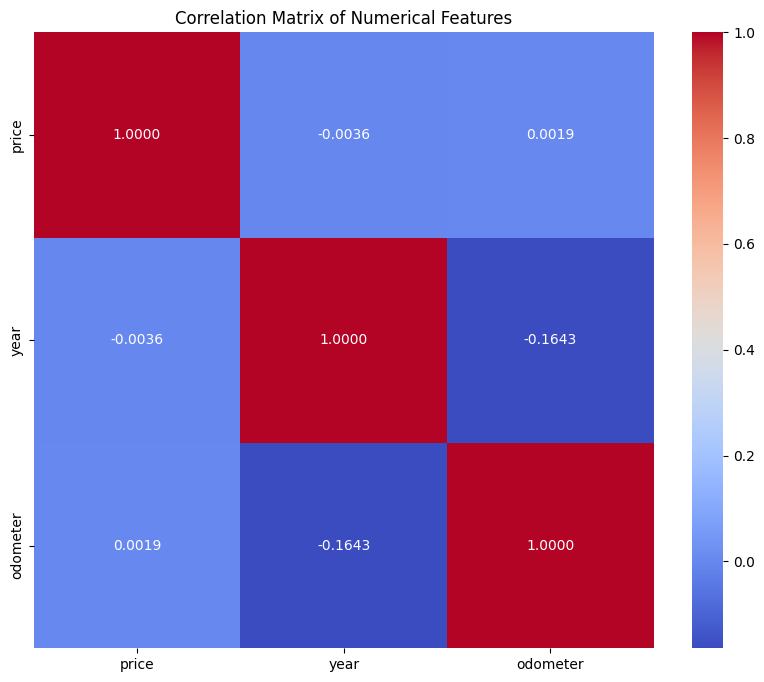

In [37]:
numerical_df = df.select_dtypes('number').drop(columns=['id'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')

plt.title('Correlation Matrix of Numerical Features');

The correlation matrix depicts that the correlation between target `price` and the numerical features are weak. Therefore, there is no numerical features that significantly impact the car price.

For the better visualization, let's observe the scatter plot of each feature with `price`.

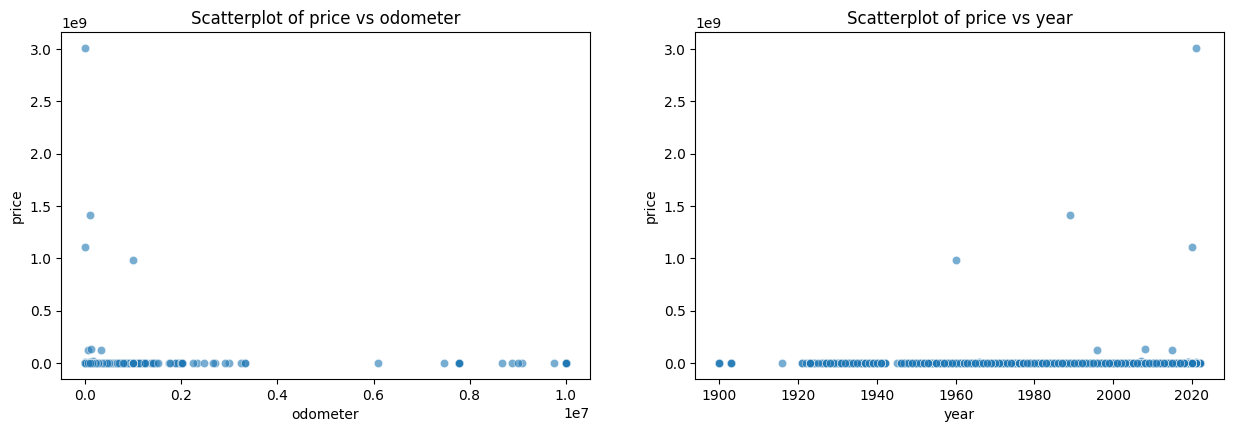

In [38]:
numerical_features = df.select_dtypes('number').columns.difference(['id', 'price'])

n_cols = 2
n_rows = (numerical_features.size + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4.5))
axes = axes.flatten() 

for idx, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f"Scatterplot of price vs {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('price')

for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

We can derive the same insights in the plots, which also shows that there is no relation between numerical features with the target. Since the price slightly changes when the independent variables vary.

- Next, we continue to find the relation between categorical features and target by applying **ANOVA test**

In [39]:
categorical_features = df.select_dtypes('object').columns

p_vals = []

for feature in categorical_features:
    groups = [df[df[feature] == category]['price'] for category in df[feature].unique() if len(df[df[feature] == category]) > 1]
    
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        p_vals.append(p_val)
        
anova_results = pd.DataFrame({'Feature': categorical_features, 'p-value': p_vals})
anova_results = anova_results.sort_values(by='p-value')

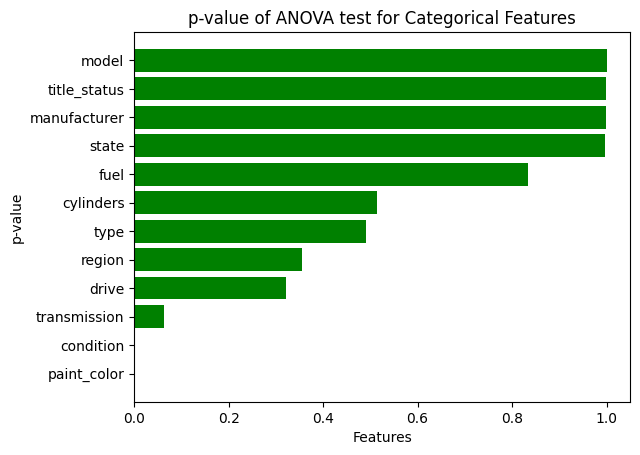

In [40]:
plt.barh(anova_results['Feature'], anova_results['p-value'], color='green')
plt.title('p-value of ANOVA test for Categorical Features')
plt.ylabel('p-value')
plt.xlabel('Features');

To find which features that have statistical significance to the target, the **p-value** of which should **smaller than 0.05**.

In [41]:
anova_results[anova_results['p-value'] < 0.05]

,Feature,p-value
10,paint_color,8.933974e-09
3,condition,1.615588e-03


The **ANOVA test** just consider there is statistical relationship between feature and target, but it does not quantify the strength of the relationship. To address that, we calculate the **effect size** measures such as **Eta-squared ($\eta^2$)**.
$$\eta^2=\frac{SSB}{SST}$$

In [42]:
significant_features = anova_results[anova_results['p-value'] < 0.05]['Feature']

effect_sizes = {}

for feature in significant_features:
    groups = [df[df[feature] == category]['price'] for category in df[feature].unique()]
    overall_mean = df['price'].mean()
    sst = sum(sum((group - overall_mean) ** 2) for group in groups)
    ssb = sum(len(group) * (group.mean() - overall_mean) ** 2 for group in groups)
    eta_squared = ssb/sst
    effect_sizes[feature] = eta_squared
    
effect_sizes_df = pd.DataFrame.from_dict(effect_sizes, orient='index', columns=['eta_squared'])
effect_sizes_df.sort_values(by='eta_squared', inplace=True)

effect_sizes_df

,eta_squared
condition,0.000194
paint_color,0.000601


As we can see, the **effect size** value of `condition` and `paint_color` really small. This indicates an extremely weak relationship between these categorical features and the target variable. The meaning of **effect size**:
- $\eta^2$ for `condition` = **0.000194** $\rightarrow$ Explains only 0.0194% of the variance in `price`.
- $\eta^2$ for `paint_color` = **0.000601** $\rightarrow$ Explains only 0.0601% of the variance in `price`.

As always, for a better observation, we will visualize the relationship on the graphs.

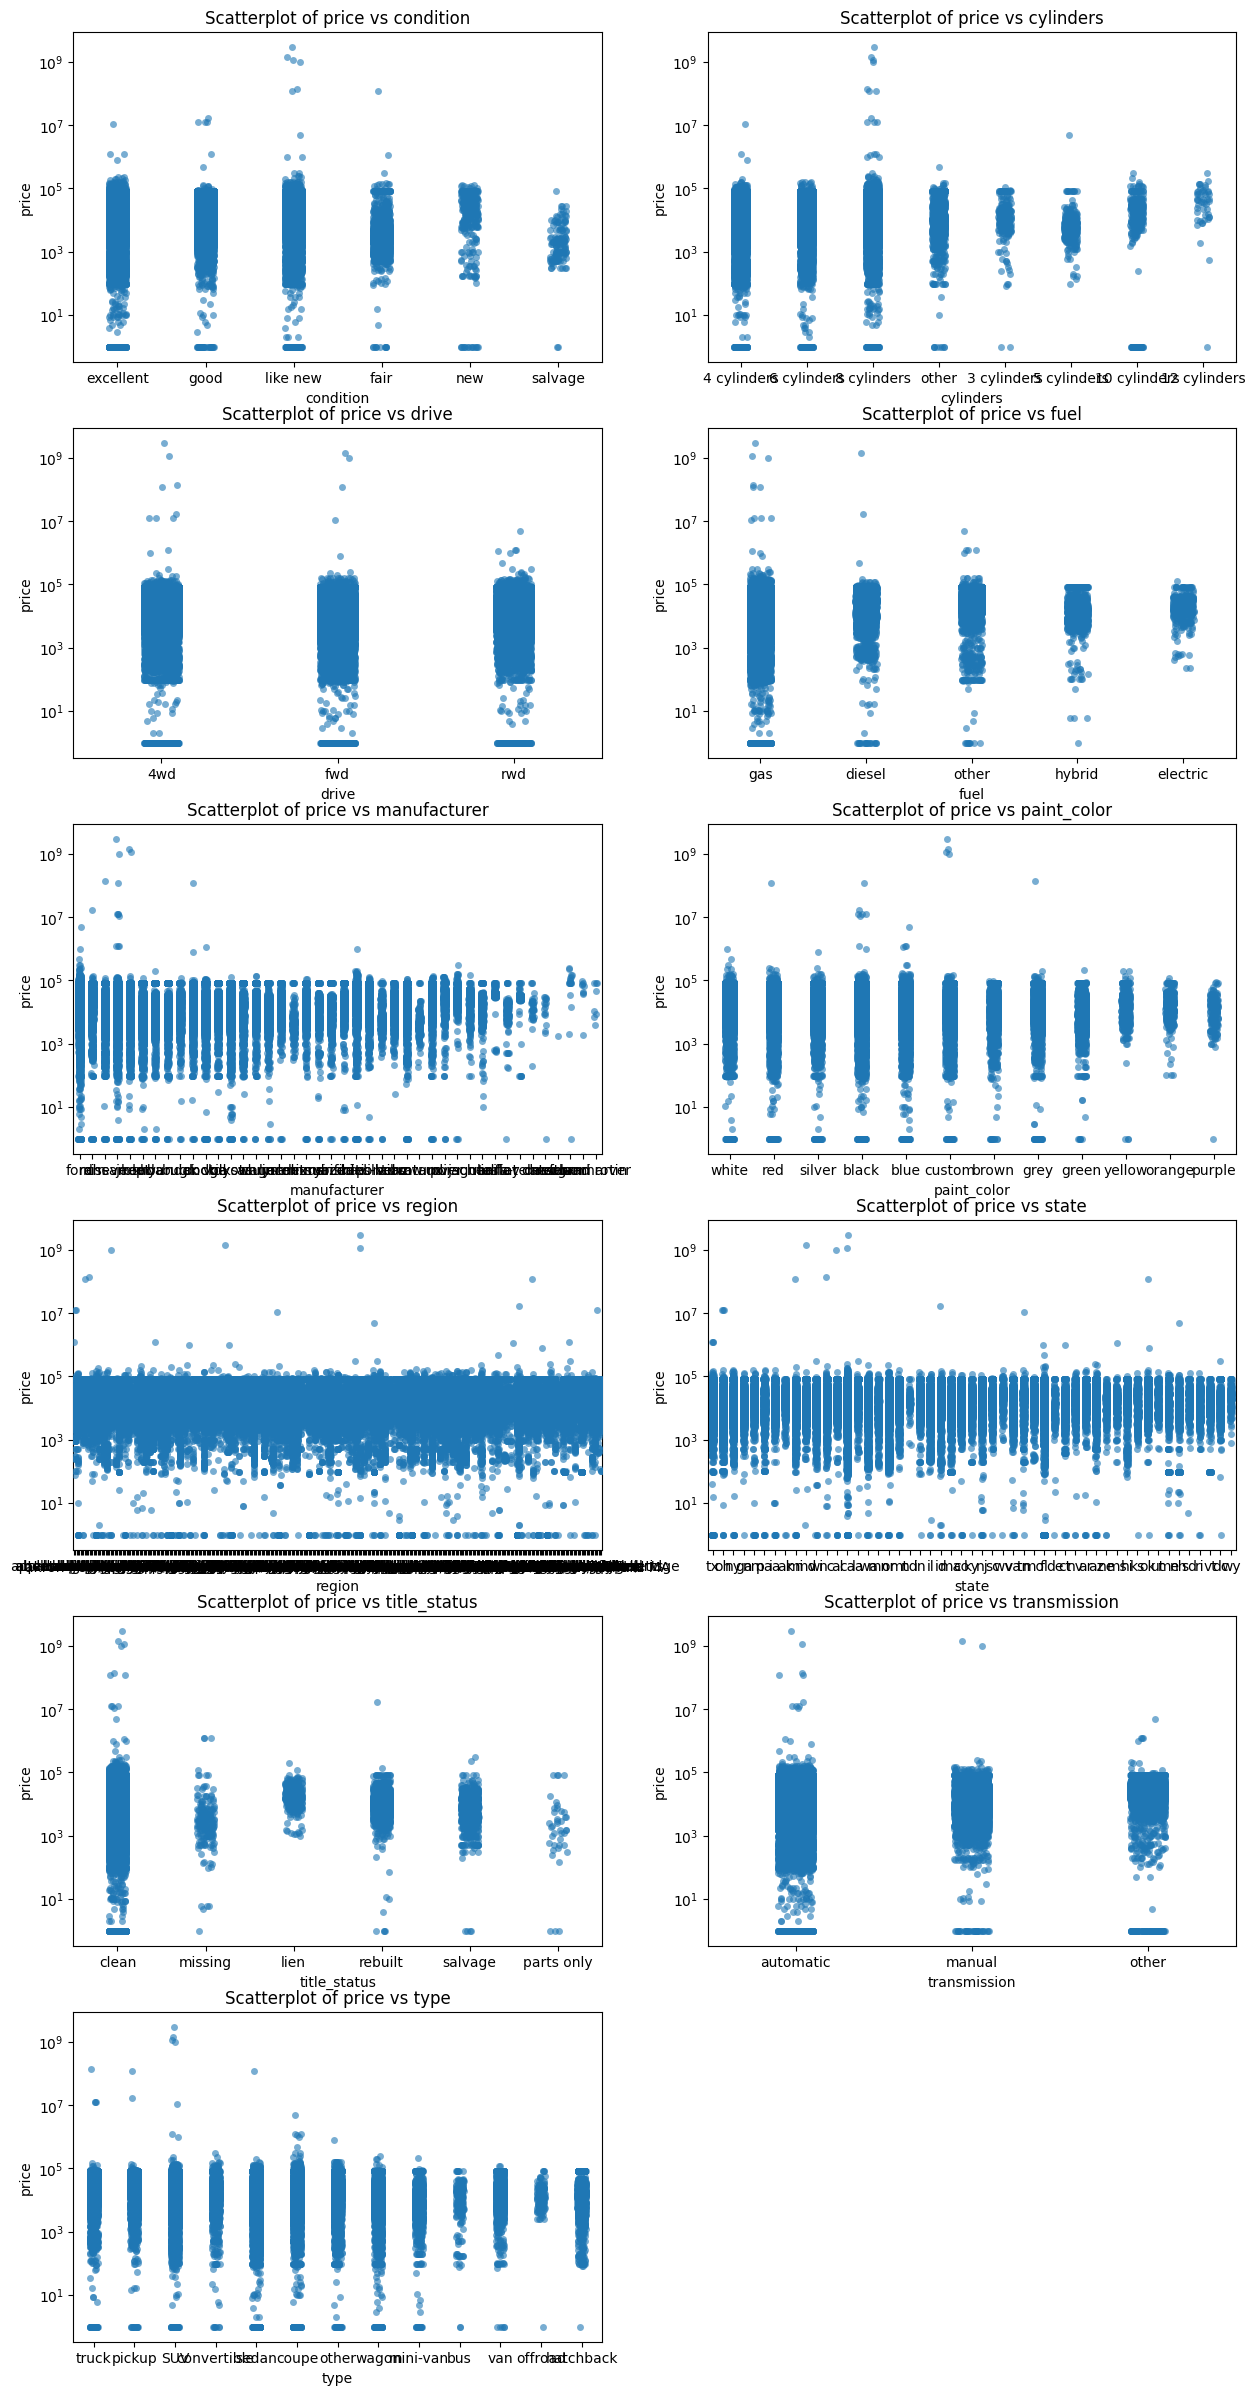

In [43]:
cate_features = df.select_dtypes('object').columns.difference(['model'])

n_cols = 2
n_rows = (cate_features.size + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() 

for idx, feature in enumerate(cate_features):
    sns.stripplot(data=df, x=feature, y='price', ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f"Scatterplot of price vs {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('price')
    axes[idx].set_yscale('log')

for idx in range(len(cate_features), len(axes)):
    fig.delaxes(axes[idx])

From the above graphs, we can conclude that no specific feature has a significant impact on car price, as the `price` ranges overlap considerably across the different categories of each feature. 


**Conclusion:**  

There are some categories that having extreme high price (e.g. 8-cylinders car, clean title-status, etc.), which indicating the impact of other factors that's not listed here. But in the general case, there is no factors that significantly affect the car price.

**Now lets answer the question: What is the common trend of all sold cars (manufacturer, year, odometer,...)? What it says about the used cars in American?**

First we need to know how long does a car last until it been sold, by get the average year since the car was manufractured until the posting date.

In [44]:
# get the mean years 
years_til_sold = df['posting_date'].dt.year - df['year']

# add to the dataframe
df['years_til_sold'] = years_til_sold

print(f'In average a car will be sold after {np.round(np.mean(years_til_sold), 1)} years used.')

In average a car will be sold after 9.8 years used.


9.8 years can be considered as useable, if you looking at the average lifespan of a car in [wiki](https://en.wikipedia.org/wiki/Car_longevity#cite_note-6) the lifespan of a car is 16.58 years so this is just about 3/5 of its life. But still, only the lifespan can't say anything, lets see how this values vary between different manufracturers and models.

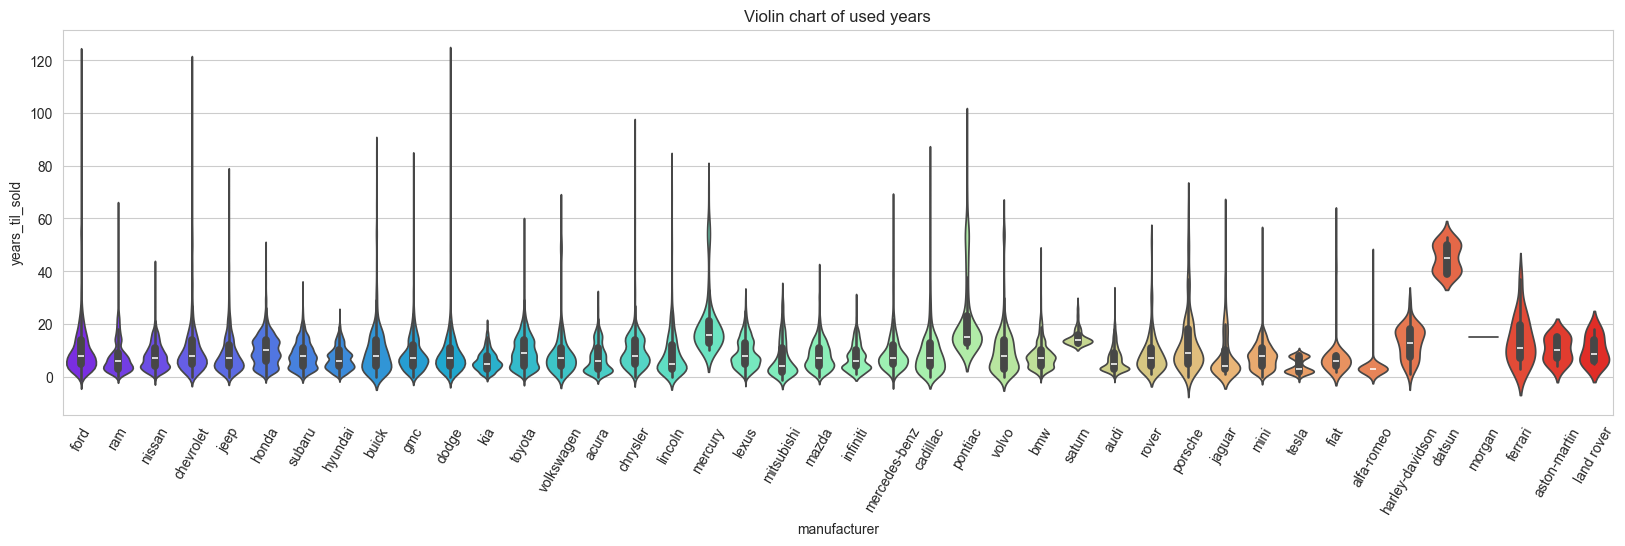

In [45]:
# use to set style of background of plot
sns.set_style('whitegrid')

# increase the size of the figure
plt.figure(figsize=(20, 5))

# rotate the x axis tick
plt.xticks(rotation=60)

# set title
plt.title('Violin chart of used years')

# visualize with violin
sns.violinplot(x='manufacturer', y='years_til_sold', hue='manufacturer', data=df, palette='rainbow');

This is the chart represent the lifespan of all cars in each manufacturers. Some cars event last for more than 100 years. But generally, most of the cars only be used for 8-20 years. From here we can also claim that datsun is the one with the highest used time among all cars.

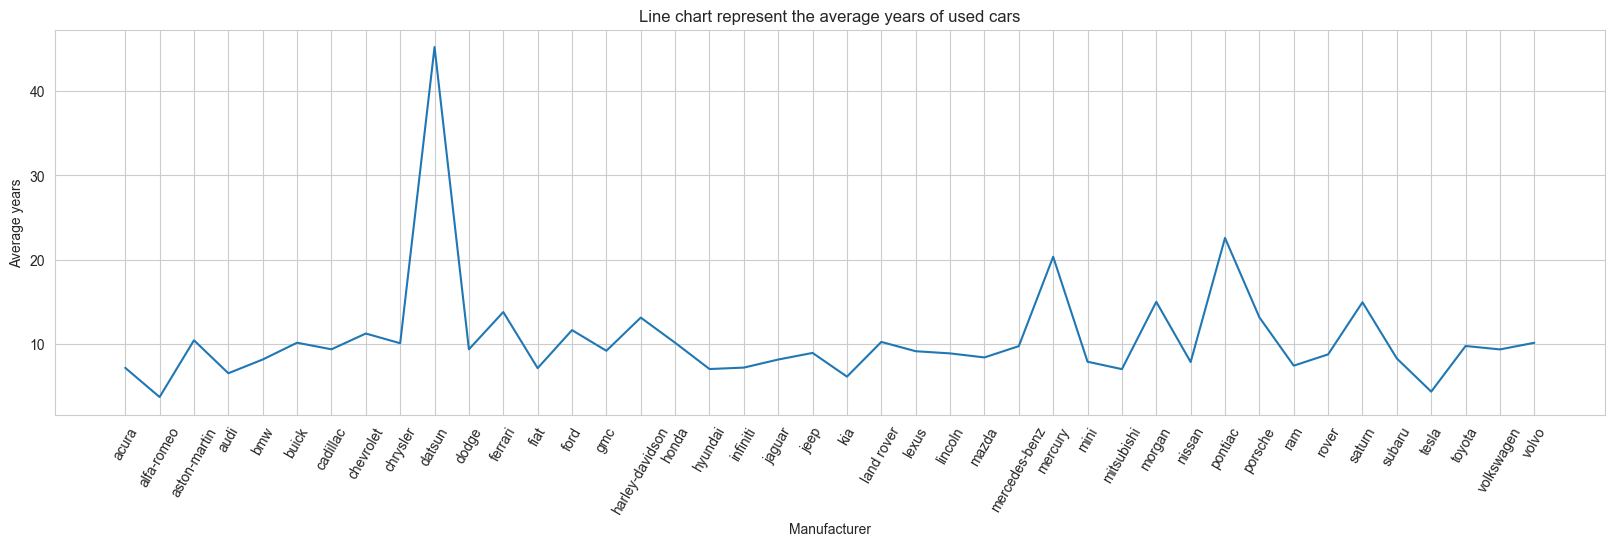

In [46]:
# get the average used year by manufacturer
used_year_by_manufacturer = df[['manufacturer', 'years_til_sold']].groupby('manufacturer').mean().reset_index()

# increase the size of the figure
plt.figure(figsize=(20, 5))

# rotate the x axis tick
plt.xticks(rotation=60)

# set title
plt.title('Line chart represent the average years of used cars')

# set x-label
plt.xlabel('Manufacturer')

# set y-label
plt.ylabel('Average years')

plt.plot(used_year_by_manufacturer['manufacturer'], used_year_by_manufacturer['years_til_sold']);

Clearly that most of the Americans are likely to sell their cars after 8-15 years. But how was the condition of those cars, are they still in good condition or what?

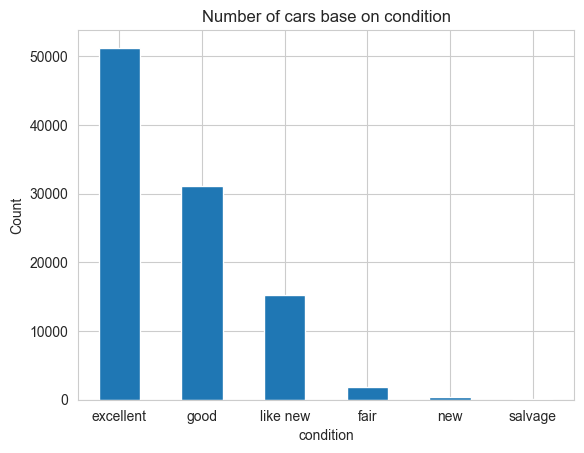

In [47]:
# set title
plt.title('Number of cars base on condition')

# set x-label
plt.xlabel('Condition')

# set y-label
plt.ylabel('Count')

df['condition'].value_counts().plot.bar()

# rotate the x axis tick
plt.xticks(rotation=0)

plt.show();

From here we can see that the majority of cars are in 3 main condition: excellent, good and like new. Here we only consider cars in excellent status, because it occupied for more than 50% in the dataset, we can say that although these cars have been used for a long time but it's still good to use. Now we can see which manufacturer has the highest cars still in excellent condition.

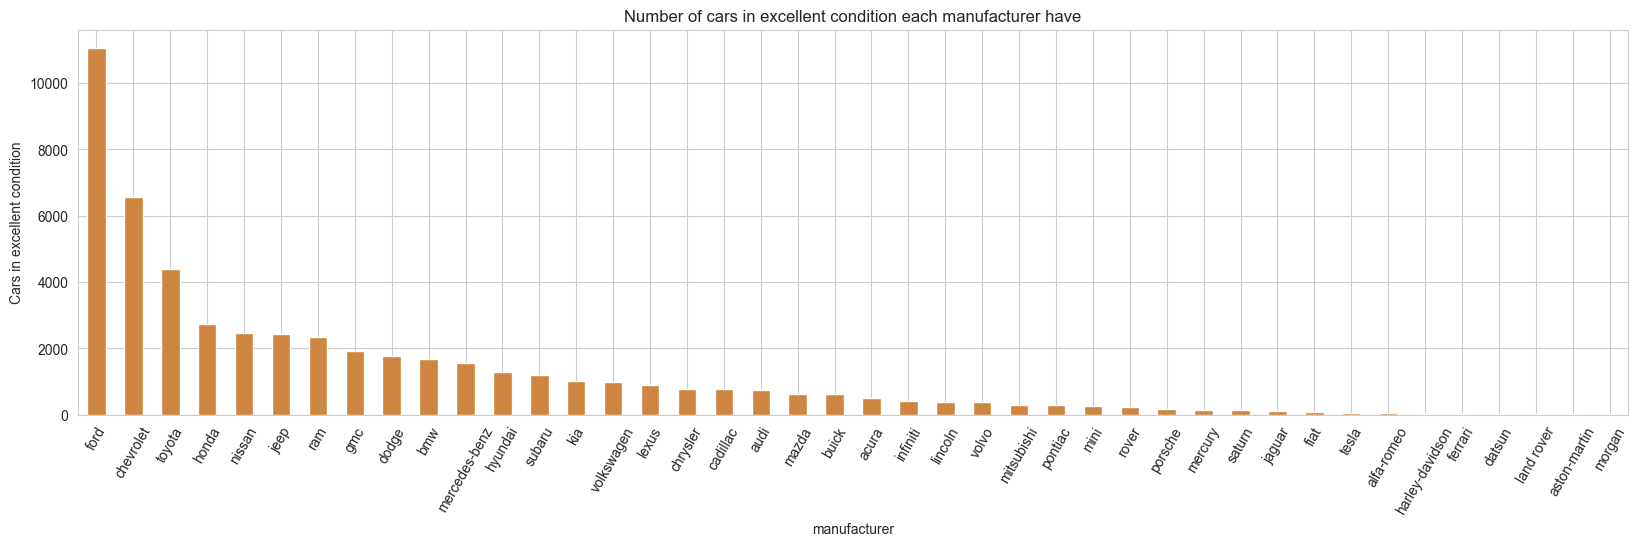

In [48]:
# increase the size of the figure
plt.figure(figsize=(20, 5))

# set title
plt.title('Number of cars in excellent condition each manufacturer have')

# set x-label
plt.xlabel('Manufacturer')

# set y-label
plt.ylabel('Cars in excellent condition')

# count the number of unique manufacturers in excellent condition
excellent_car_per_manufacturer = df[df['condition'] == 'excellent']['manufacturer'].value_counts()
excellent_car_per_manufacturer.plot.bar(color='peru')

# rotate the x axis tick
plt.xticks(rotation=60)

plt.show();

So Ford is the one with the highest number of cars still in excellent condition, almost double the second competitor is chevrolet. Notice that ford has the average used time around 11 years, after 11 years and the car still in excellent condition is a surprise result. Now lets see how the number of car per manufacturer distribute.

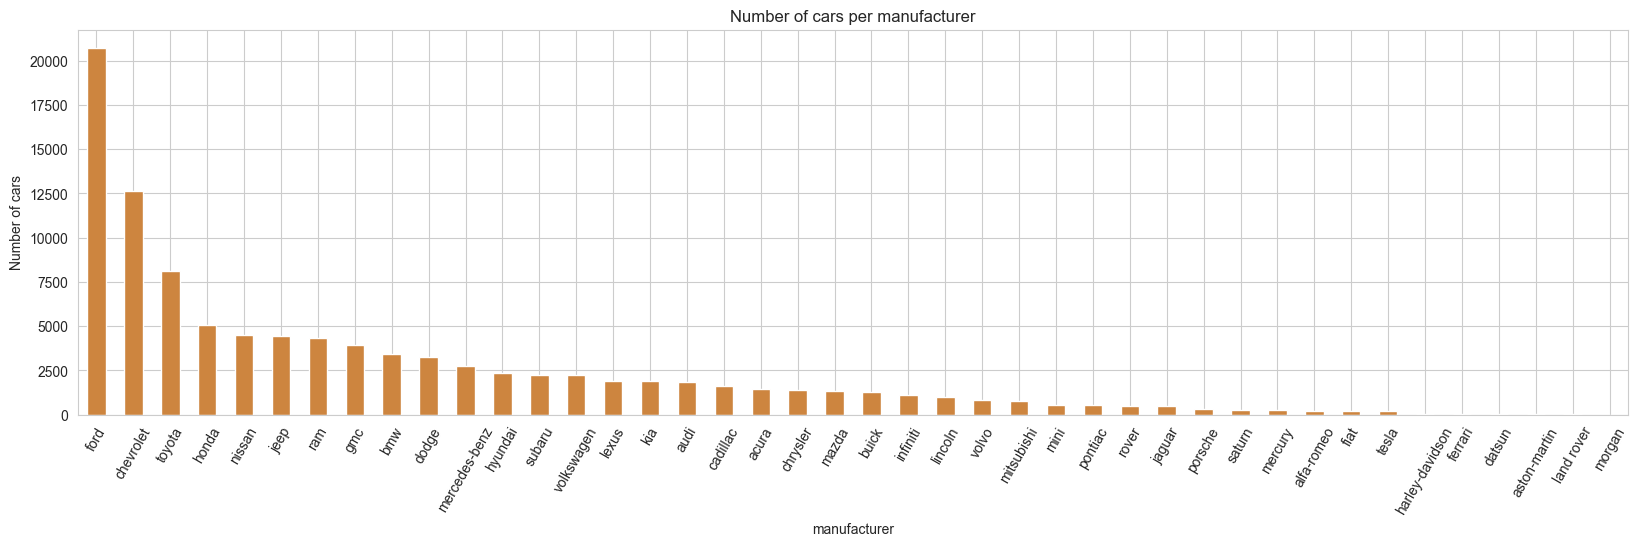

In [49]:
# increase the size of the figure
plt.figure(figsize=(20, 5))

# set title
plt.title('Number of cars per manufacturer')

# set x-label
plt.xlabel('Manufacturer')

# set y-label
plt.ylabel('Number of cars')

# number of cars per manufacturer
number_of_cars_per_manu = df['manufacturer'].value_counts()
number_of_cars_per_manu.plot.bar(color='peru')

# rotate the x axis tick
plt.xticks(rotation=60)

plt.show();

The number of excellent condition cars and the number of cars per manufacturer distribute quite even, the first 5<sup>th</sup> position are the same. All of them combine together occupied for more than 50% of the cars.

Does all cars have porper license?

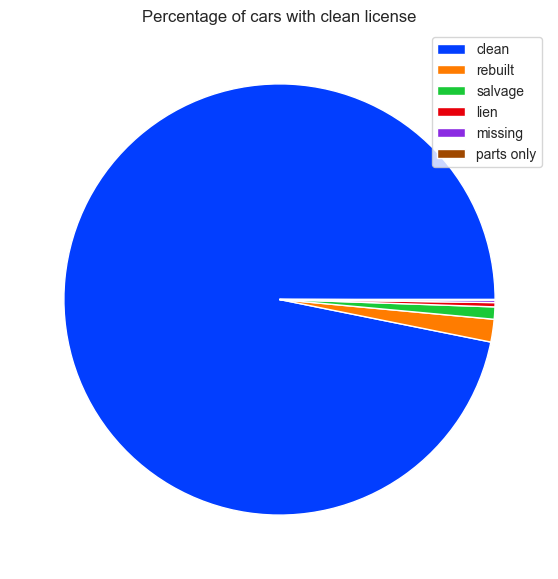

In [63]:
# increase the size of the figure
plt.figure(figsize=(7, 7))

# set title
plt.title('Percentage of cars with clean license')

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

# count the number of clean license
clean_license = df['title_status'].value_counts()

# defind pie chart parameters
patches, texts = plt.pie(clean_license, colors=palette_color)

# show lengend
plt.legend(patches, clean_license.index)

plt.show();

Most of the cars have valid license so we don't have to worry.

How far does a car go each year in average?

In [51]:
# get the average distance a car goes until it been sold
dis_mile = df['odometer'].mean()

print(f'In average a car goes {round(dis_mile)} before it been sold.')
print(f'A car goes {round(dis_mile / years_til_sold.mean())} miles a year, equivalent to {round(dis_mile / years_til_sold.mean() * 1.61)} km')

In average a car goes 97874 before it been sold.
A car goes 10016 miles a year, equivalent to 16126 km


Driving 16100 km a year means driving about 44 km a day which is a very long distance. However, as we have analyze above, the majority of cars are still in excellent condition by the time it been posted for sell showing the meticulous of American in using cars. For comparison, this distance is longer than the distance from Hà Nội to Hồ Chí Minh city which about 1200 km.

What type of transmission that most peopel refer?

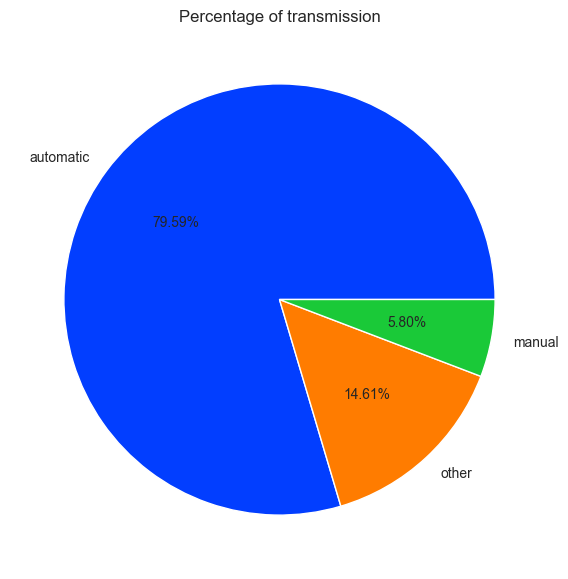

In [52]:
df['transmission'].value_counts()

# increase the size of the figure
plt.figure(figsize=(7, 7))

# set title
plt.title('Percentage of transmission')

# count the number of transmission
transmission = df['transmission'].value_counts()

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

plt.pie(transmission, labels=transmission.index, autopct='%.2f%%', colors=palette_color);

79.59% of the cars use automatic transmission, this result is quite reasonable as it gives user many benifit while driving. But how is this associate with the feature manufacturer and condition?

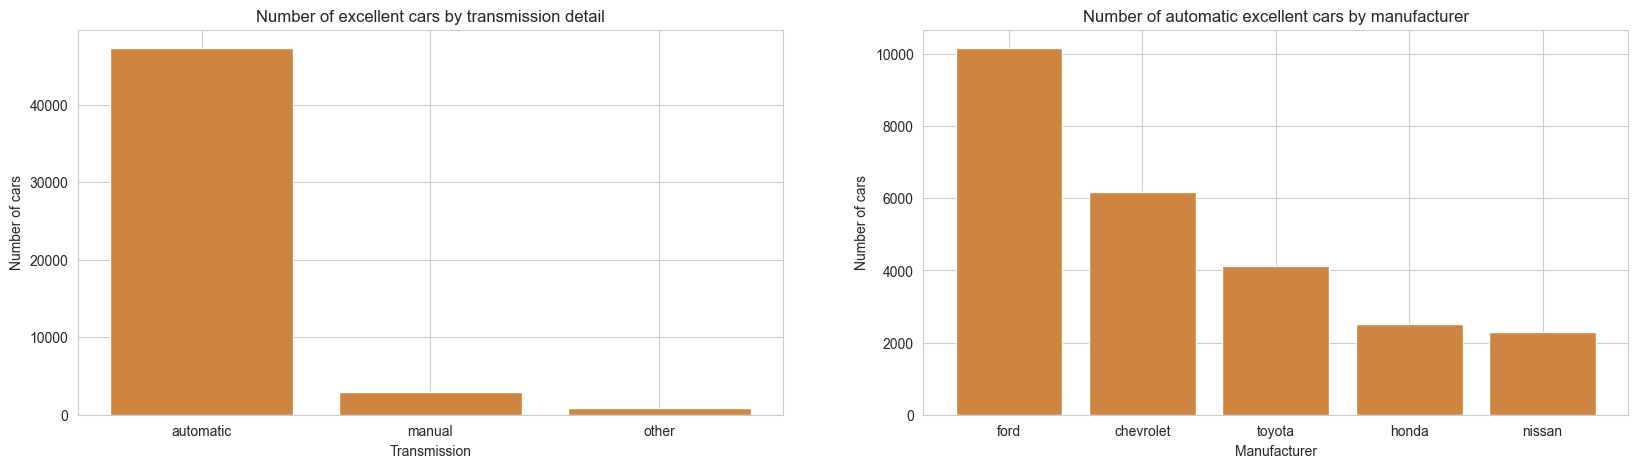

In [53]:
# create subplot for visualize
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axe = axe.flatten()

# get the number of excellent cars transmission detail
excel_car_trans = df[df['condition'] == 'excellent']['transmission'].value_counts()

# visualize with bar chart
axe[0].bar(excel_car_trans.index, height=excel_car_trans, color='peru')

# set title
axe[0].set_title(f'Number of excellent cars by transmission detail')

# set x, y label
axe[0].set_xlabel('Transmission')
axe[0].set_ylabel('Number of cars')

# get the number of automatic transmission cars of top 8 manufacturers
manufacturers = number_of_cars_per_manu[:5].index

# dict to store the value of cars
num_of_cars_auto = {}

for manu in manufacturers:
    # get the automatic cars of a specific manufacturer
    auto_car = df[df['manufacturer'] == manu]
    auto_car = auto_car[auto_car['transmission'] == 'automatic']
    
    # get those with excellent condition
    auto_car = auto_car['condition'] == 'excellent'

    num_of_cars_auto[manu] = auto_car.sum()

# visualize with bar chart
axe[1].bar(num_of_cars_auto.keys(), height=num_of_cars_auto.values(), color='peru')

# set title
axe[1].set_title(f'Number of automatic excellent cars by manufacturer')

# set x, y label
axe[1].set_xlabel('Manufacturer')
axe[1].set_ylabel('Number of cars')

plt.show();

By combining the previous result, clearly that most of the cars in the top 8 manufacturer are automatic cars.

Now we can come to the conclusion for our question: What is the common trend of all sold cars (manufacturer, year, odometer,...)? What it says about the used cars in American?
- The most famous car's manufacturers are: ford, chevroolet, toyota, honda and nissan. These 5 manufacturers occupy for 50% of cars in US.
- American tend to sell their cars after using about 2/3 of its lifespan, but despite that the majority of cars are still in excellent condition by the time they were sold. Which show the meticulous in taking care of the car, also the durability of the cars in US.
- Automatic cars is the most well-known one thanks to its convenience.

### **5. Reflection**

**What difficulties have you encountered?**
- The first thing we have encounter is the size of this dataset, because if so big (about 400k rows) so we have to reduce the size of the dataset down to 100k rows. This have us save lots of time not only when reading the dataset but also when running the KNN algorithm.
- Secondly is the preprocessing step, there are so many missing values to deal with, which took us a lot of time to process.
- Lack of experience in visualizing and analyzing data.
- As droping the rows of the dataset, we may have missed some valuable records, which leads to unbalanced data. Consequently, some statistical analysis may not as precise as the original dataset.

**What have you learned?**
- We have learned some crucial technique in handling missing data, extracting and analyzing infomation from the dataset to answer the questions.
- Accustomed to using pandas, matplotlib in a data science project.
- Feature selection using statistical skills.

**If you had more time, what would you do?**
- We will try to do this project on the original dataset to get the most optimal result.
- Try to apply learning model like: soft-max or mlp to answer some difficult question like predicting the sell prices.

### **6. Meeting Plan**
- [Group meeting plan](https://docs.google.com/spreadsheets/d/14PgkAvbJT5YgEsNxhYu3NGGVtS9i-t9KSed2r9BbRJw/edit?usp=sharing)

### **7. References**

- [KNN imputation](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)
- [Effect sizes in ANOVA test](https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize)